In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\kvsth\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [43]:
df1 = pd.read_csv("Country Wise Visitors Ways.csv")
df2 = pd.read_csv("Country Wise Yearly Visitors.csv")
df3 = pd.read_csv("General Data 2014-2020.csv")
df4 = pd.read_csv("Month Wise FFA.csv")

In [44]:
df1.head()

,Country of Nationality,2014 AIR,2014 SEA,2014 RAIL,2014 LAND,2015 AIR,2015 SEA,2015 RAIL,2015 LAND,2016 AIR,...,2018 RAIL,2018 LAND,2019 AIR,2019 SEA,2019 RAIL,2019 LAND,2020 AIR,2020 SEA,2020 RAIL,2020 LAND
0,Canada,99.2,0.1,0.0,0.7,99.0,0.5,0.0,0.5,99.1,...,0.0,0.5,98.10,1.22,0.01,0.67,98.1,1.0,0.0,0.9
1,United States Of America,99.5,0.1,0.0,0.4,99.3,0.5,0.0,0.2,99.5,...,0.0,0.3,98.97,0.68,0.01,0.34,99.1,0.5,0.0,0.4
2,Argentina,97.9,0.0,0.0,2.1,97.7,0.4,0.0,1.9,98.5,...,0.0,1.5,96.61,1.54,0.02,1.83,97.3,1.5,0.0,1.2
3,Brazil,98.7,0.2,0.0,1.1,99.3,0.4,0.0,0.3,99.0,...,0.0,0.6,96.93,2.33,0.00,0.74,97.1,2.4,0.0,0.5
4,Mexico,99.1,0.2,0.0,0.7,98.0,1.6,0.0,0.4,96.4,...,0.0,0.4,95.82,3.89,0.00,0.29,96.7,2.8,0.0,0.4


# Cleaning and Reading the data

In [3]:
df1.columns

Index(['Country of Nationality', '2014 AIR', '2014 SEA', '2014 RAIL',
       '2014 LAND', '2015 AIR', '2015 SEA', '2015 RAIL', '2015 LAND',
       '2016 AIR', '2016 SEA', '2016 RAIL', '2016 LAND', '2017 AIR',
       '2017 SEA', '2017 RAIL', '2017 LAND', '2018 AIR', '2018 SEA',
       '2018 RAIL', '2018 LAND', '2019 AIR', '2019 SEA', '2019 RAIL',
       '2019 LAND', '2020 AIR', '2020 SEA', '2020 RAIL', '2020 LAND'],
      dtype='object')

In [4]:
df1.isna().sum()

Country of Nationality    0
2014 AIR                  0
2014 SEA                  0
2014 RAIL                 0
2014 LAND                 0
2015 AIR                  0
2015 SEA                  0
2015 RAIL                 0
2015 LAND                 0
2016 AIR                  0
2016 SEA                  0
2016 RAIL                 0
2016 LAND                 0
2017 AIR                  0
2017 SEA                  0
2017 RAIL                 0
2017 LAND                 0
2018 AIR                  0
2018 SEA                  0
2018 RAIL                 0
2018 LAND                 0
2019 AIR                  0
2019 SEA                  0
2019 RAIL                 0
2019 LAND                 0
2020 AIR                  0
2020 SEA                  0
2020 RAIL                 0
2020 LAND                 0
dtype: int64

In [8]:
import pandas as pd
from scipy import stats

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset file

# Exclude non-numeric columns from the dataset
numeric_df = df1.select_dtypes(include=['int64', 'float64'])

# Calculate z-scores for each data point in the numeric part of the dataset
z_scores = stats.zscore(numeric_df)

# Define a threshold for considering outliers
threshold = 3  # Adjust this threshold as needed based on your data and requirements

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Print rows containing outliers
print("Rows containing outliers:")
print(df1[outlier_indices])


Rows containing outliers:
   Country of Nationality  2014 AIR  2014 SEA  2014 RAIL  2014 LAND  2015 AIR  \
22                Hungary       0.0       0.0        0.0        0.0       0.0   
43             Bangladesh      99.5       0.4        0.0        0.1      99.7   
46               Maldives      15.1       0.1        0.0       84.8      10.2   
47                  Nepal      14.3       0.1        0.0       85.6      14.7   
48               Pakistan      89.3       0.2        0.0       10.5      89.3   
53            Philippines      81.1      18.8        0.0        0.1      76.1   

    2015 SEA  2015 RAIL  2015 LAND  2016 AIR  ...  2018 RAIL  2018 LAND  \
22       0.0        0.0        0.0      98.8  ...        0.0        0.7   
43       0.2        0.0        0.1      14.4  ...       14.6       68.3   
46       0.1        0.0       89.7      99.9  ...        0.0        0.1   
47       0.1        0.0       85.2      95.7  ...        0.0        5.3   
48       0.2        0.0       1

# Finding the country with the highest number of visitors and in which year with the count

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Country Wise Yearly Visitors.csv')  

# Find the maximum number of visitors across all years for each country
df['Max_Visitors'] = df[['2014', '2015', '2016', '2017', '2018', '2019', '2020']].max(axis=1)

# Get the corresponding year for the maximum number of visitors
df['Year_of_Max_Visitors'] = df[['2014', '2015', '2016', '2017', '2018', '2019', '2020']].idxmax(axis=1).str.extract('(\d+)')
df['Year_of_Max_Visitors'] = df['Year_of_Max_Visitors'].astype(int)

# Find the country with the highest number of visitors and in which year
max_visitors_country = df.loc[df['Max_Visitors'].idxmax()]

print("Country with the highest number of visitors:")
print("Country:", max_visitors_country['Country'])
print("Number of Visitors:", max_visitors_country['Max_Visitors'])
print("Year:", max_visitors_country['Year_of_Max_Visitors'])


Country with the highest number of visitors:
Country: Bangladesh
Number of Visitors: 2577727
Year: 2019


In [4]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load the dataset
df = pd.read_csv('Country Wise Yearly Visitors.csv')  # Replace 'your_dataset.csv' with the path to your dataset file

# Find the total number of visitors for each country
df['Total_Visitors'] = df[['2014', '2015', '2016', '2017', '2018', '2019', '2020']].sum(axis=1)

# Sort the DataFrame by total visitors in descending order
df_sorted = df.sort_values(by='Total_Visitors', ascending=False)

# Create the pie chart with Plotly
fig = go.Figure(data=[go.Pie(
    values=df_sorted['Total_Visitors'],
    labels=df_sorted['Country'],
    hole=0.4,  # Create a donut chart with a hole in the center
    textinfo='percent+label',  # Display both percentage and label on hover
    textposition='inside',  # Place text labels inside the pie slices
    marker_colors=px.colors.qualitative.Pastel  # Use a qualitative color palette
)])

# Customize the chart layout
fig.update_layout(
    title='Distribution of Visitors by Country',
    title_x=0.5,  # Center the title
    font_size=14
)

# Display the plot
fig.show()


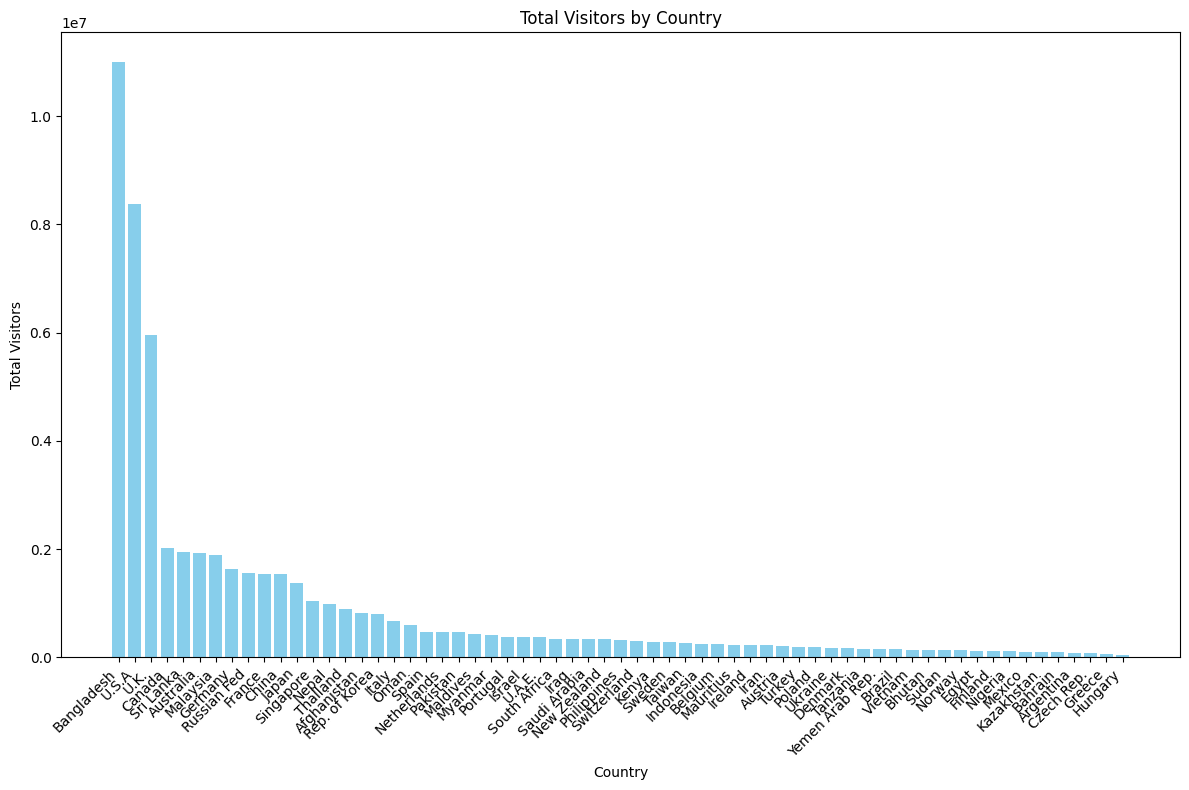

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Country Wise Yearly Visitors.csv')  

# Find the total number of visitors for each country
df['Total_Visitors'] = df[['2014', '2015', '2016', '2017', '2018', '2019', '2020']].sum(axis=1)

# Sort the DataFrame by total visitors in descending order
df_sorted = df.sort_values(by='Total_Visitors', ascending=False)

# Plot a bar plot
plt.figure(figsize=(12, 8))
plt.bar(df_sorted['Country'], df_sorted['Total_Visitors'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.title('Total Visitors by Country')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of country names
plt.show()


# Line graph representing the distribution of visitors across different transportation modes and years

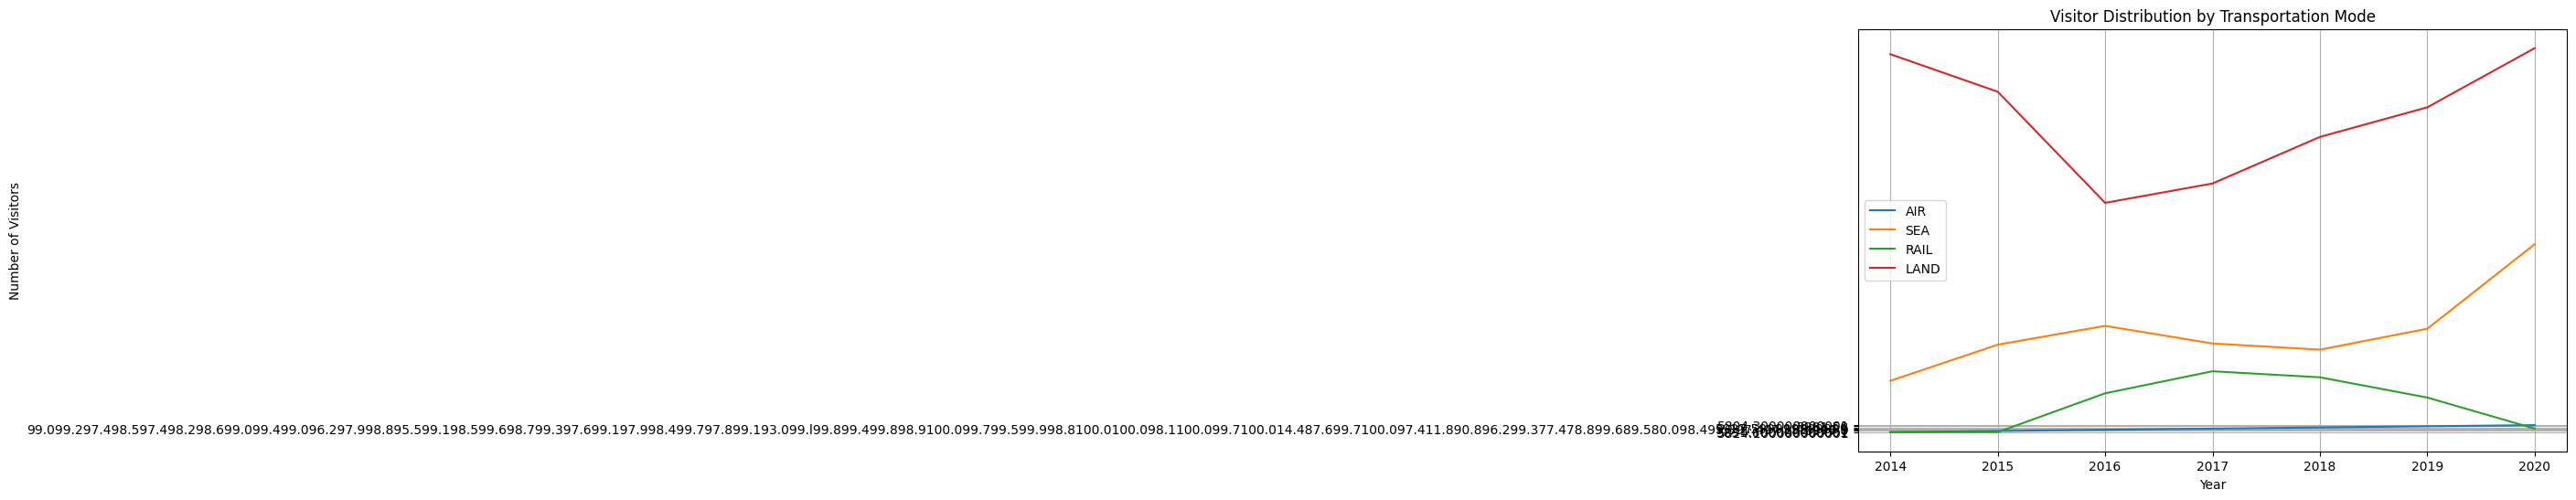

In [7]:
# line graph representing the distribution of visitors across different transportation modes and years


transport_modes = ['AIR', 'SEA', 'RAIL', 'LAND']
years = range(2014, 2021)

plt.figure(figsize=(10, 6))

for mode in transport_modes:
    mode_data = [df1[f'{year} {mode}'].sum() for year in years]
    plt.plot(years, mode_data, label=mode)

plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.title('Visitor Distribution by Transportation Mode')
plt.legend()
plt.grid(True)
plt.show()



# The type of tranport used the most frequently


C:\Users\kvsth\AppData\Local\Temp\ipykernel_2432\933015988.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_visitors_by_mode = {mode: df[[f'{year} {mode}' for year in range(2014, 2021)]].sum(axis=1).sum() for mode in transport_modes}


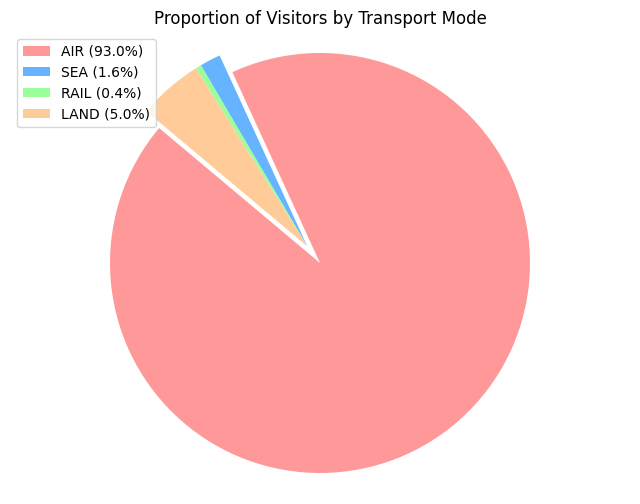

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Country Wise Visitors Ways.csv')

# Get the total number of visitors for each transport mode
transport_modes = ['AIR', 'SEA', 'RAIL', 'LAND']
total_visitors_by_mode = {mode: df[[f'{year} {mode}' for year in range(2014, 2021)]].sum(axis=1).sum() for mode in transport_modes}

# Calculate percentages for each transport mode
total_visitors = sum(total_visitors_by_mode.values())
percentages = {mode: (count / total_visitors) * 100 for mode, count in total_visitors_by_mode.items()}

# Define colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

explode= (0.1, 0,0,0)

# Create a pie chart without labels
plt.figure(figsize=(8, 6))
wedges, _ = plt.pie(total_visitors_by_mode.values(), explode=explode ,labels=None, startangle=140, colors=colors)

# Create legend labels with transport mode names and percentages
legend_labels = [f'{mode} ({percent:.1f}%)' for mode, percent in percentages.items()]

# Create a legend with transport mode names and percentages
plt.legend(wedges, legend_labels, loc='upper left')

plt.title('Proportion of Visitors by Transport Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# The overall trend in the number of visitors across all transport modes from 2014 to 2020?

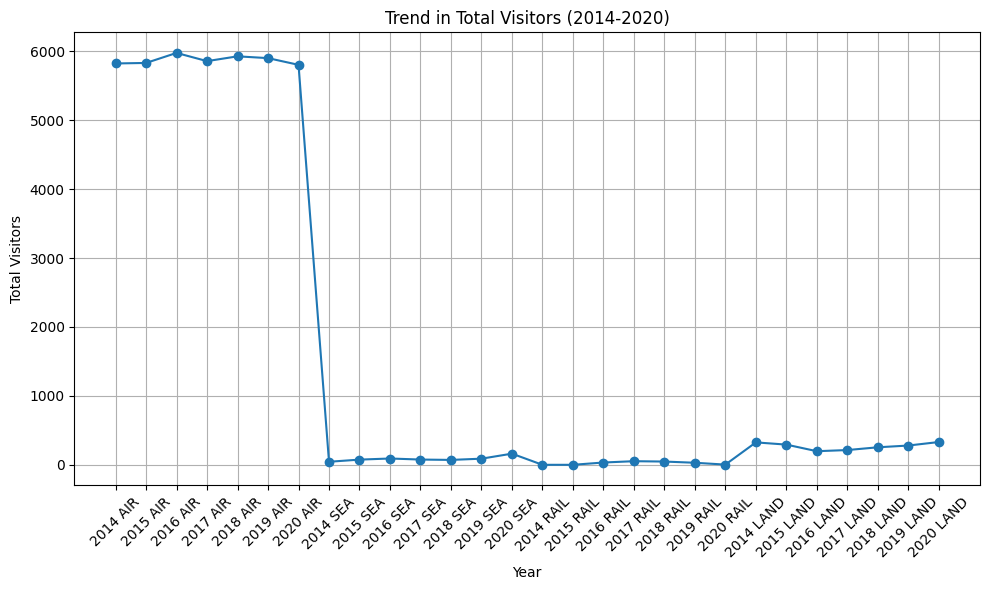

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Country Wise Visitors Ways.csv')

# Extract years and calculate total visitors for each year
years = [str(year) for year in range(2014, 2021)]
total_visitors_by_year = df[[f'{year} AIR' for year in range(2014, 2021)] +
                            [f'{year} SEA' for year in range(2014, 2021)] +
                            [f'{year} RAIL' for year in range(2014, 2021)] +
                            [f'{year} LAND' for year in range(2014, 2021)]]

# Replace non-numeric values with NaN
total_visitors_by_year = total_visitors_by_year.apply(pd.to_numeric, errors='coerce')

# Remove columns with only NaN values
total_visitors_by_year = total_visitors_by_year.loc[:, total_visitors_by_year.notna().any()]

# Calculate total visitors for each year
total_visitors_by_year = total_visitors_by_year.sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(total_visitors_by_year.index, total_visitors_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Visitors')
plt.title('Trend in Total Visitors (2014-2020)')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


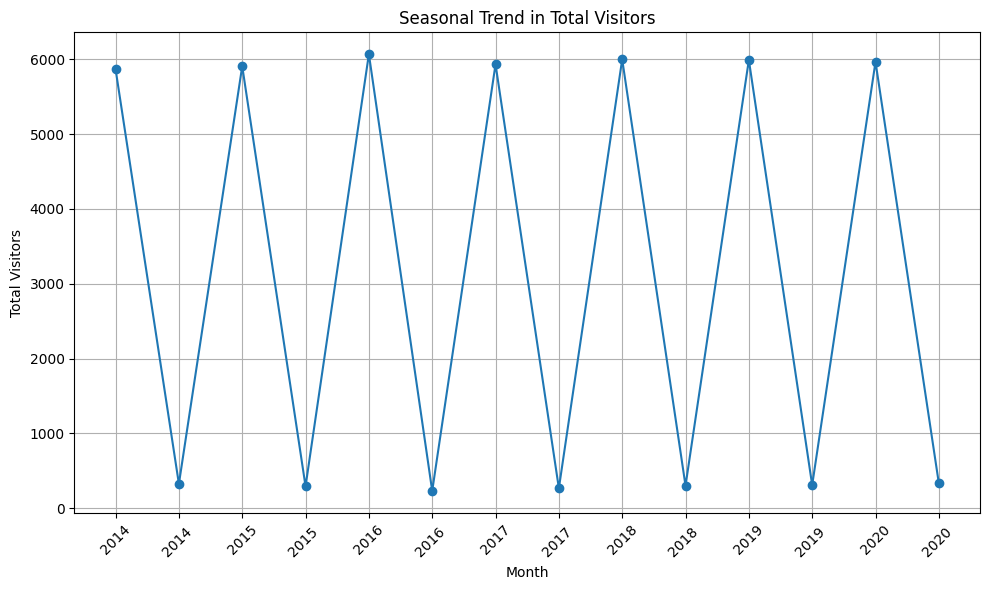

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Country Wise Visitors Ways.csv')

# Convert non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Extract month-wise data and calculate total visitors for each month
monthwise_data = {}
for column in df.columns[1:]:
    month = column[:-4]  # Extract month information from the column name
    if month not in monthwise_data:
        monthwise_data[month] = df[column]
    else:
        monthwise_data[month] += df[column]

# Create a DataFrame from the monthwise_data dictionary
monthwise_df = pd.DataFrame(monthwise_data)

# Calculate total visitors for each month
total_visitors_by_month = monthwise_df.sum()

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
plt.plot(total_visitors_by_month.index, total_visitors_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Visitors')
plt.title('Seasonal Trend in Total Visitors')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


General Data 2014-2020 

In [8]:
data = pd.read_csv("General Data 2014-2020.csv")
data.head()

,year,noftaii,noftaiiagr,noindfi,noindfiagr,nodtvasu,nodtvasuagr,feeftit,feeftitagr,feeftust,...,apfitr,apritragr,ipwiita,ipwirwta,ipwsiitr,ipwirwtr,ipaprita,ipaprirta,ipapritr,ipaprirtr
0,2014,7.68,10.2,18.33,10.3,1290.00,12.9,123320,14.5,20.240,...,377.0,4.7,0.68,41,1.62,15,2.91,12,5.37,8
1,2015,8.03,4.5,20.38,11.1,1432.00,11.6,135193,9.6,21.070,...,418.9,-0.3,0.68,40,1.71,14,2.88,11,5.03,7
2,2016,8.80,9.7,21.87,7.3,1613.60,12.7,154146,14.0,22.920,...,366.7,4.9,1.18,25,1.88,13,4.72,8,6.25,7
3,2017,10.04,14.0,23.94,9.5,1652.49,2.3,177874,15.4,27.310,...,389.5,5.0,1.17,26,2.05,13,4.81,7,7.01,7
4,2018,10.56,5.2,26.30,9.8,1854.90,11.9,194892,9.6,28.585,...,432.9,9.3,1.24,25,1.97,13,5.05,7,6.60,7


# How many tourists visited India each year from 2014 till 2020?

In [10]:
import plotly.express as px
px.bar(data, x="year", y="noftaii", labels={"year":"Year", "noftaii": "Tourists (in millions)"}, 
    title="Foreign tourists arriving in India.")

# the share of arrivals in India, with the arrivals in the rest of the world

In [15]:
fig = px.bar(data, x="year", y="ipwiita",labels={"year":"Year", "ipwiita": "(%)"}, 
            title="India’s Position in World, Share of India in International Tourist Arrivals(in %)(2014-2020).")
fig.show()

# How much money these tourists generate each year and how that is linked to the amount of visiting tourists on only the foreign exchange earnings in US$

In [20]:
#Plotting the scattergraph with Plotly

data["stryear"] = data["year"].astype("object")
fig3 = px.scatter(data, x="feeftust", y="noftaii",color="stryear", 
       labels={"feeftust":"Estimated Foreign Exchange Earnings from Tourism in US$ terms in Billions", "noftaii": "Tourists (in millions)"},
       title="Foreign Exchange Earnings from Tourism in US($) terms in Billions (2014-2020).", hover_data=["year"])

#customizing the scatter plot

fig3.update_traces(marker=dict(size=12, line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig3.update_layout(showlegend=True)
fig3.show()

# India level International Tourism Receipts in (US$ Billions)(2014-2020)

In [21]:
# Creating new column to get the absolute number of India level International Tourism Receipts in US$ Billion 
# world level International Tourism Receipts in US$ Billion * Share of India in International Tourism Receipts (US$ terms) (in %)

data["spendinIndia"] = (data["witr"] * data["ipwsiitr"]) / 100
fig5 = px.bar(data, x="year", y="spendinIndia", labels={"year":"Year", "spendinIndia": "(US$ Billions)"},
              title="India level International Tourism Receipts in (US$ Billions)(2014-2020).")
fig5.show()

# correlation between the number of Indian nationals departing from India and the number of foreign tourist arrivals? How does this correlation change over time ?

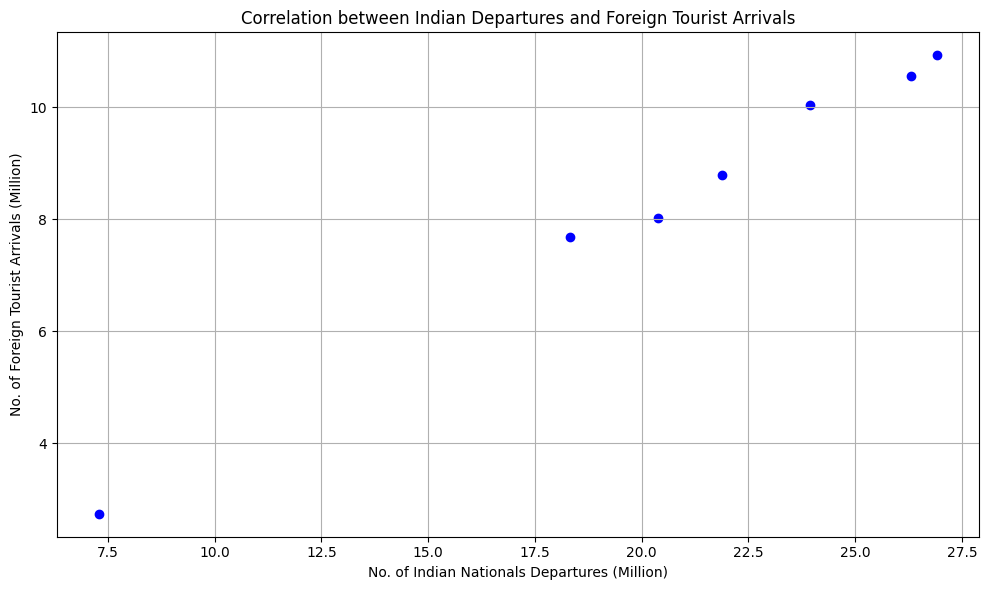

Correlation coefficient between Indian Departures and Foreign Tourist Arrivals: 0.9972326056915954


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("General Data 2014-2020.csv")

# Select relevant columns
indian_departures = df['noindfi']
foreign_arrivals = df['noftaii']

# Calculate correlation
correlation = indian_departures.corr(foreign_arrivals)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(indian_departures, foreign_arrivals, color='blue')
plt.title('Correlation between Indian Departures and Foreign Tourist Arrivals')
plt.xlabel('No. of Indian Nationals Departures (Million)')
plt.ylabel('No. of Foreign Tourist Arrivals (Million)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Correlation coefficient between Indian Departures and Foreign Tourist Arrivals:", correlation)


Month Wise FFA 


In [23]:
data = pd.read_csv("Month Wise FFA.csv")
data.columns 

Index(['year', 'january', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december'],
      dtype='object')

# Avergae Monthly Foreign Tourist Arrivals

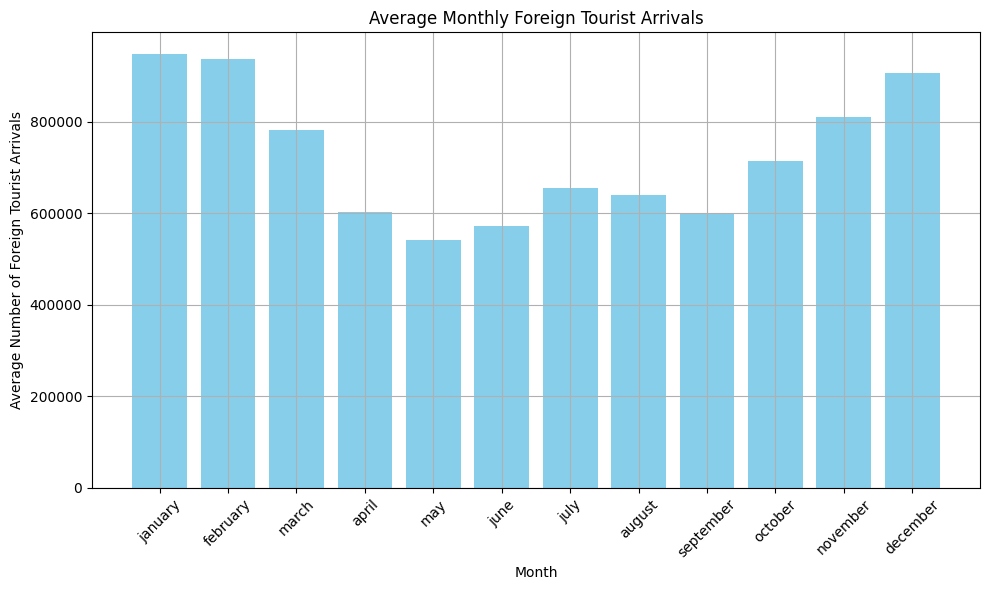

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Month Wise FFA.csv")

# Calculate the average tourist arrivals for each month across all years
monthly_avg_arrivals = df.drop(columns=['year']).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_arrivals.index, monthly_avg_arrivals.values, color='skyblue')
plt.title('Average Monthly Foreign Tourist Arrivals')
plt.xlabel('Month')
plt.ylabel('Average Number of Foreign Tourist Arrivals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# line graph showing the month-wise foreign tourist arrivals over the years. Each line represents the trend for a specific month.

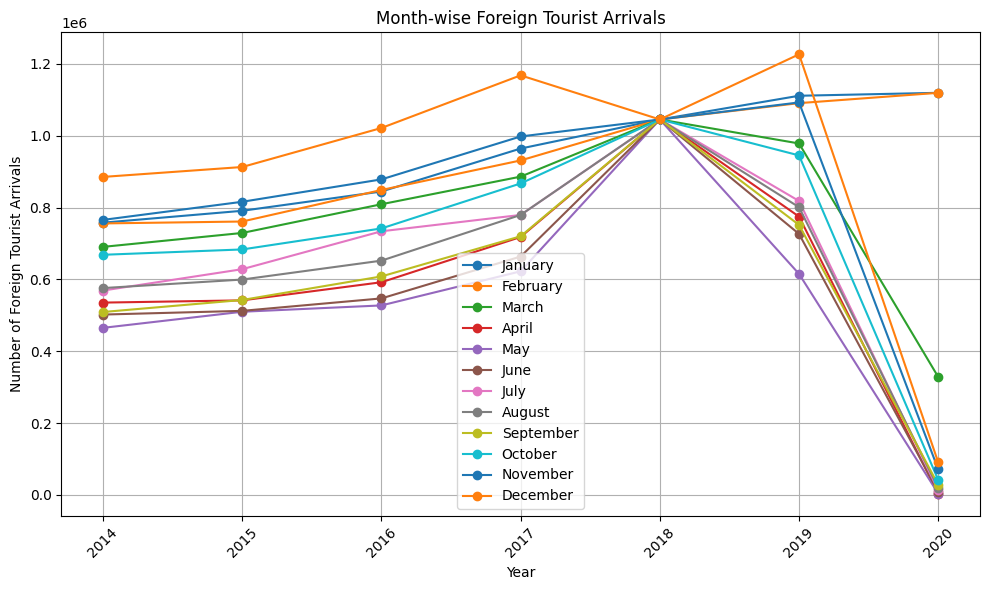

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Month Wise FFA.csv")

# Plotting
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:  # Exclude the 'year' column
    plt.plot(df['year'], df[col], marker='o', label=col.capitalize())

plt.title('Month-wise Foreign Tourist Arrivals')
plt.xlabel('Year')
plt.ylabel('Number of Foreign Tourist Arrivals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Distribution of FFA variables every month 

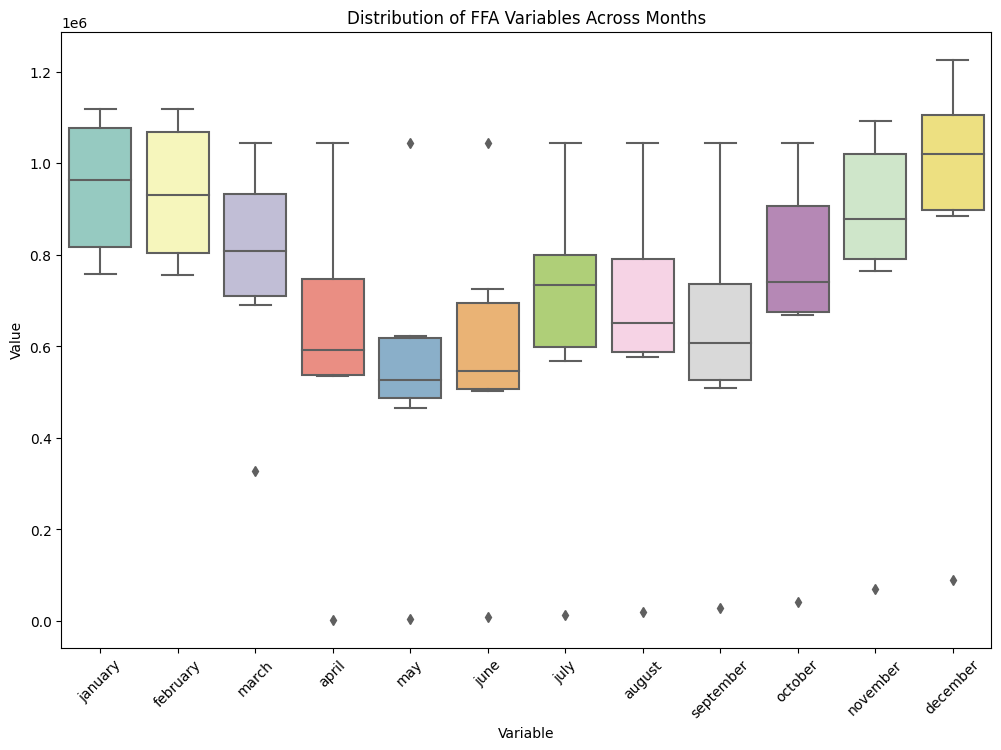

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Month wise FFA.csv')

# Convert 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'])

# Plot box plots for each variable across different months
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, 1:], palette='Set3')
plt.title('Distribution of FFA Variables Across Months')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Co-relation matrix of Monthly Tourist Arrivals 
# displaying correlations between tourist arrivals in different months

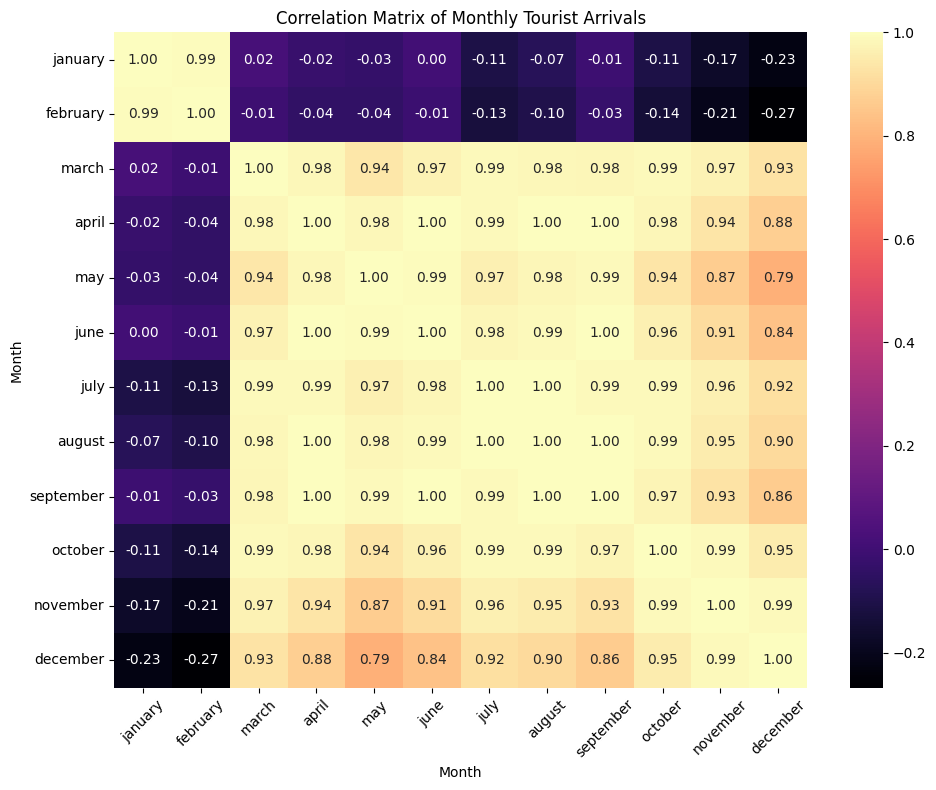

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Month Wise FFA.csv")

# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['year']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix of Monthly Tourist Arrivals')
plt.xlabel('Month')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


c:\Users\kvsth\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



TypeError: unsupported operand type(s) for +: 'range' and 'list'

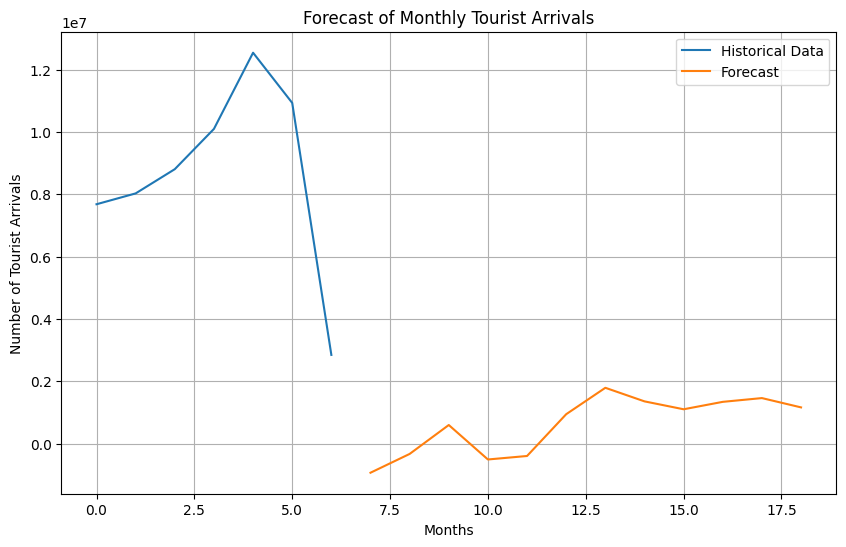

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv("Month Wise FFA.csv")

# Extracting month-wise data
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
monthly_arrivals = df[months].sum(axis=1)

# Fit ARIMA model
model = ARIMA(monthly_arrivals, order=(5,1,0))  # Example order, you can tune this
fit_model = model.fit()

# Forecast future tourist arrivals
forecast = fit_model.forecast(steps=12)  # Forecast for the next 12 months

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_arrivals.index, monthly_arrivals, label='Historical Data')
plt.plot(range(len(monthly_arrivals), len(monthly_arrivals) + 12), forecast, label='Forecast')
plt.title('Forecast of Monthly Tourist Arrivals')
plt.xlabel('Months')
plt.ylabel('Number of Tourist Arrivals')
plt.legend()
plt.grid(True)
plt.xticks(range(len(monthly_arrivals)) + list(range(len(monthly_arrivals), len(monthly_arrivals) + 12)), 
           months + ['Forecast'], rotation=45)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# Load the dataset
df = pd.read_csv("Month Wise FFA.csv")

# Extract available years
available_years = df['year'].unique()

# Create dropdown widget for selecting the year
year_dropdown = Dropdown(options=available_years, description='Year')

# Define plotting function
def plot_monthly_distribution(year):
    plt.figure(figsize=(10, 6))

    # Filter data for the selected year
    year_data = df[df['year'] == year]

    # Plotting the bar chart
    plt.bar(year_data.columns[1:], year_data.iloc[0, 1:], color='skyblue')
    plt.title(f'Monthly Foreign Tourist Arrivals in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Tourist Arrivals')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display interactive plot with dropdown
interact(plot_monthly_distribution, year=year_dropdown)


interactive(children=(Dropdown(description='Year', options=(2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 20…

<function __main__.plot_monthly_distribution(year)>

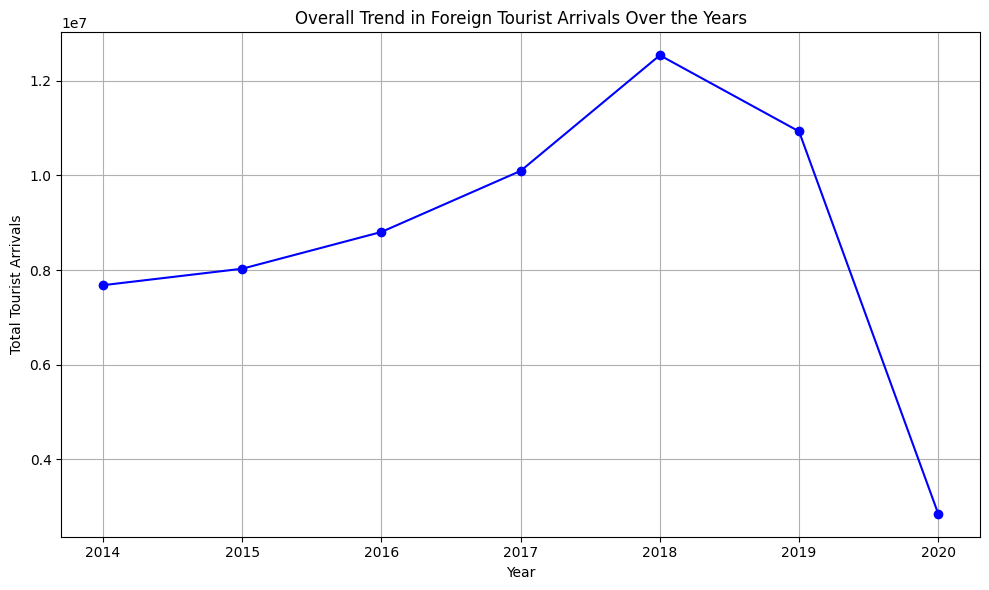

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Month Wise FFA.csv")

# Grouping the data by year and summing up the monthly tourist arrivals
yearly_total_arrivals = df.groupby('year').sum().sum(axis=1)

# Plotting the overall trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_total_arrivals.index, yearly_total_arrivals.values, marker='o', color='blue')
plt.title('Overall Trend in Foreign Tourist Arrivals Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Tourist Arrivals')
plt.grid(True)
plt.tight_layout()
plt.show()
